In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
df = pd.read_csv("/content/sample_data/breast-cancer-wisconsin-data_data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [ ]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
df.shape

(569, 33)

In [ ]:
df.drop(columns=['Unnamed: 32'], inplace = True)

In [ ]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

**EXPLORATORY DATA ANALYSIS**

In [ ]:
#Dataset with numerical values only
df_numerical = df.copy()
df_numerical.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df_numerical['diagnosis_x'] = LabelEncoder().fit_transform(df_numerical['diagnosis'])


In [ ]:
df_numerical.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'diagnosis_x'],
      dtype='object')

In [ ]:
df_numerical.drop(columns = ['diagnosis'], axis = "columns", inplace = True)

In [ ]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
df_numerical['diagnosis_x'].head(20)
# 1 = M(Malignant, 0 = B(Benign))

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    0
Name: diagnosis_x, dtype: int64

In [ ]:
df_corr = df_numerical.copy()
df_corr.drop('id', axis = 'columns', inplace = True)

In [ ]:
df_corr.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_x
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


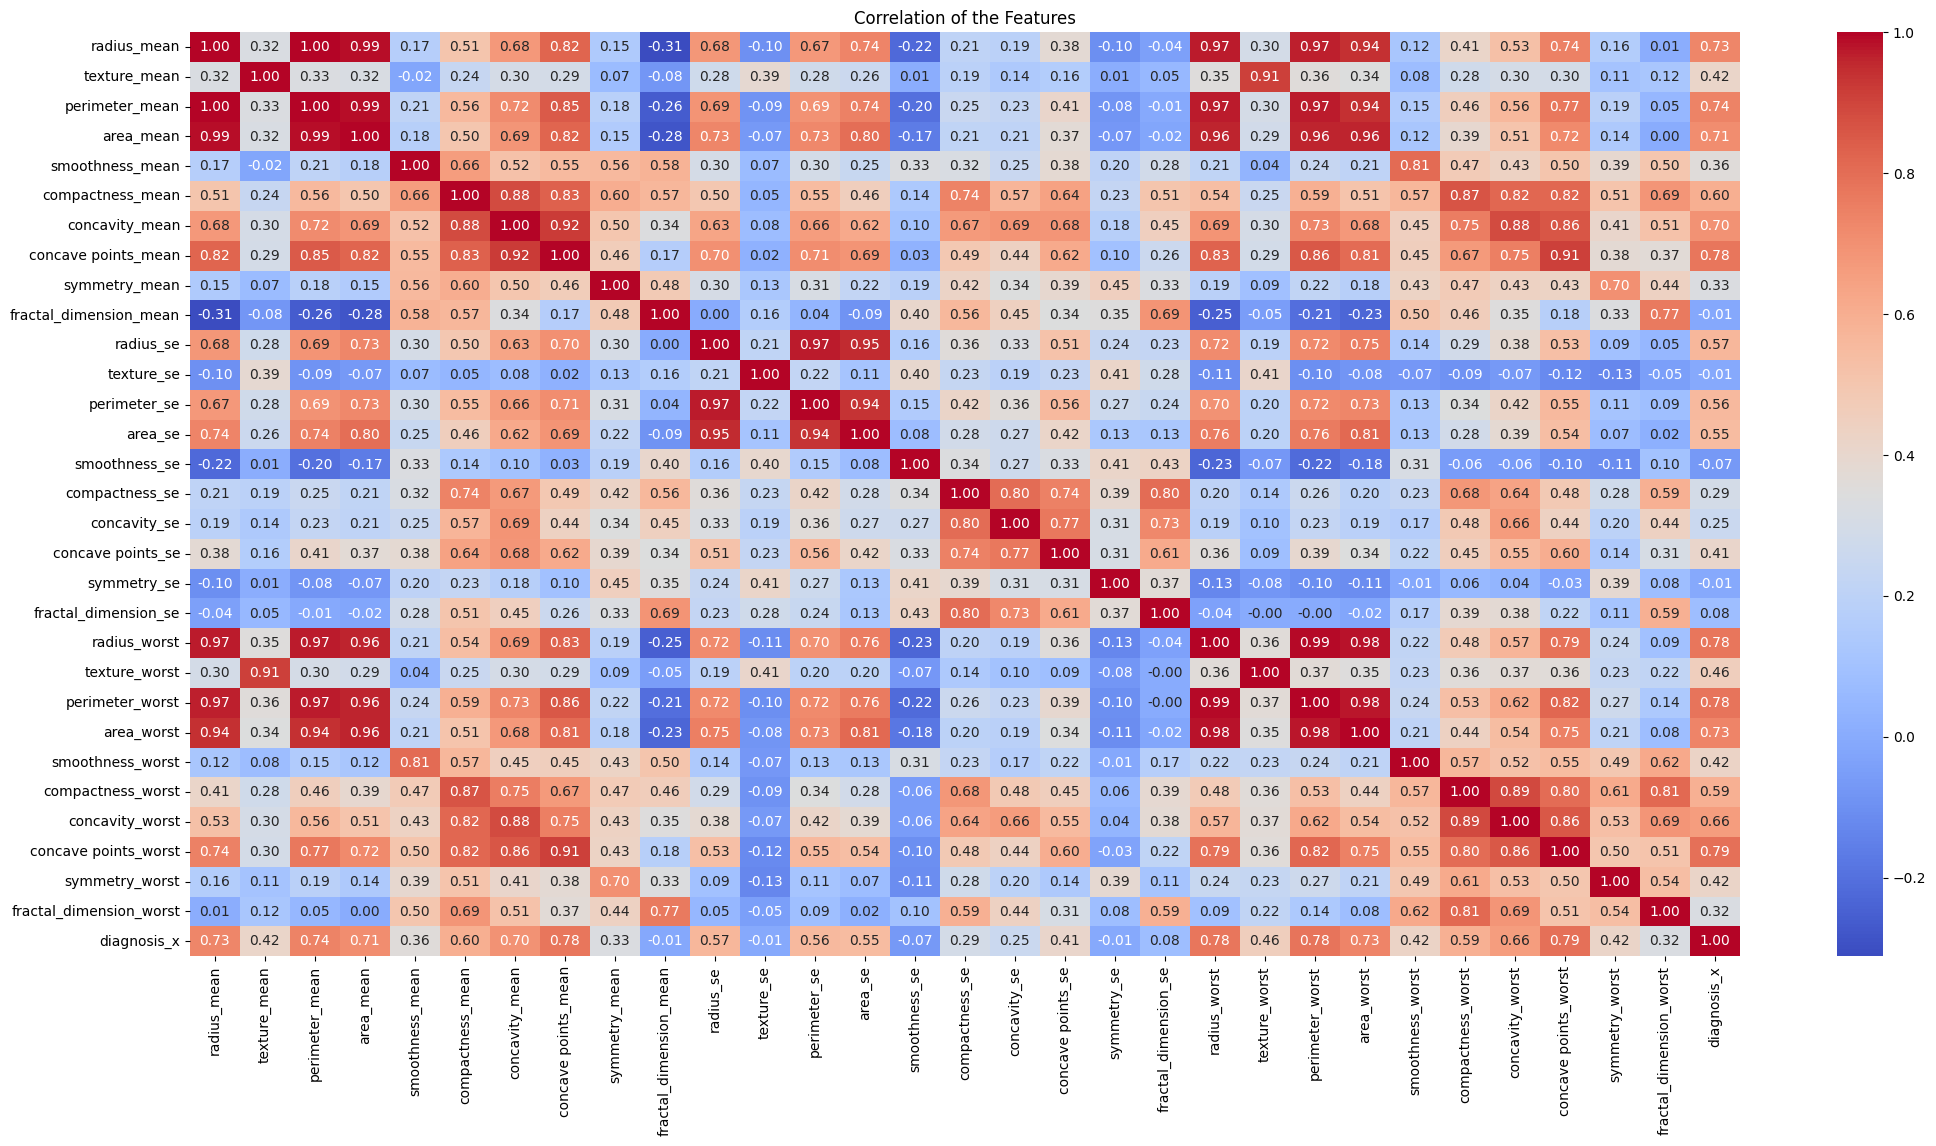

In [ ]:
plt.figure(figsize = (25,12))
sns.heatmap(data = df_corr.corr(), fmt = ".2f", annot=True, cmap="coolwarm")
plt.title("Correlation of the Features")
plt.show()

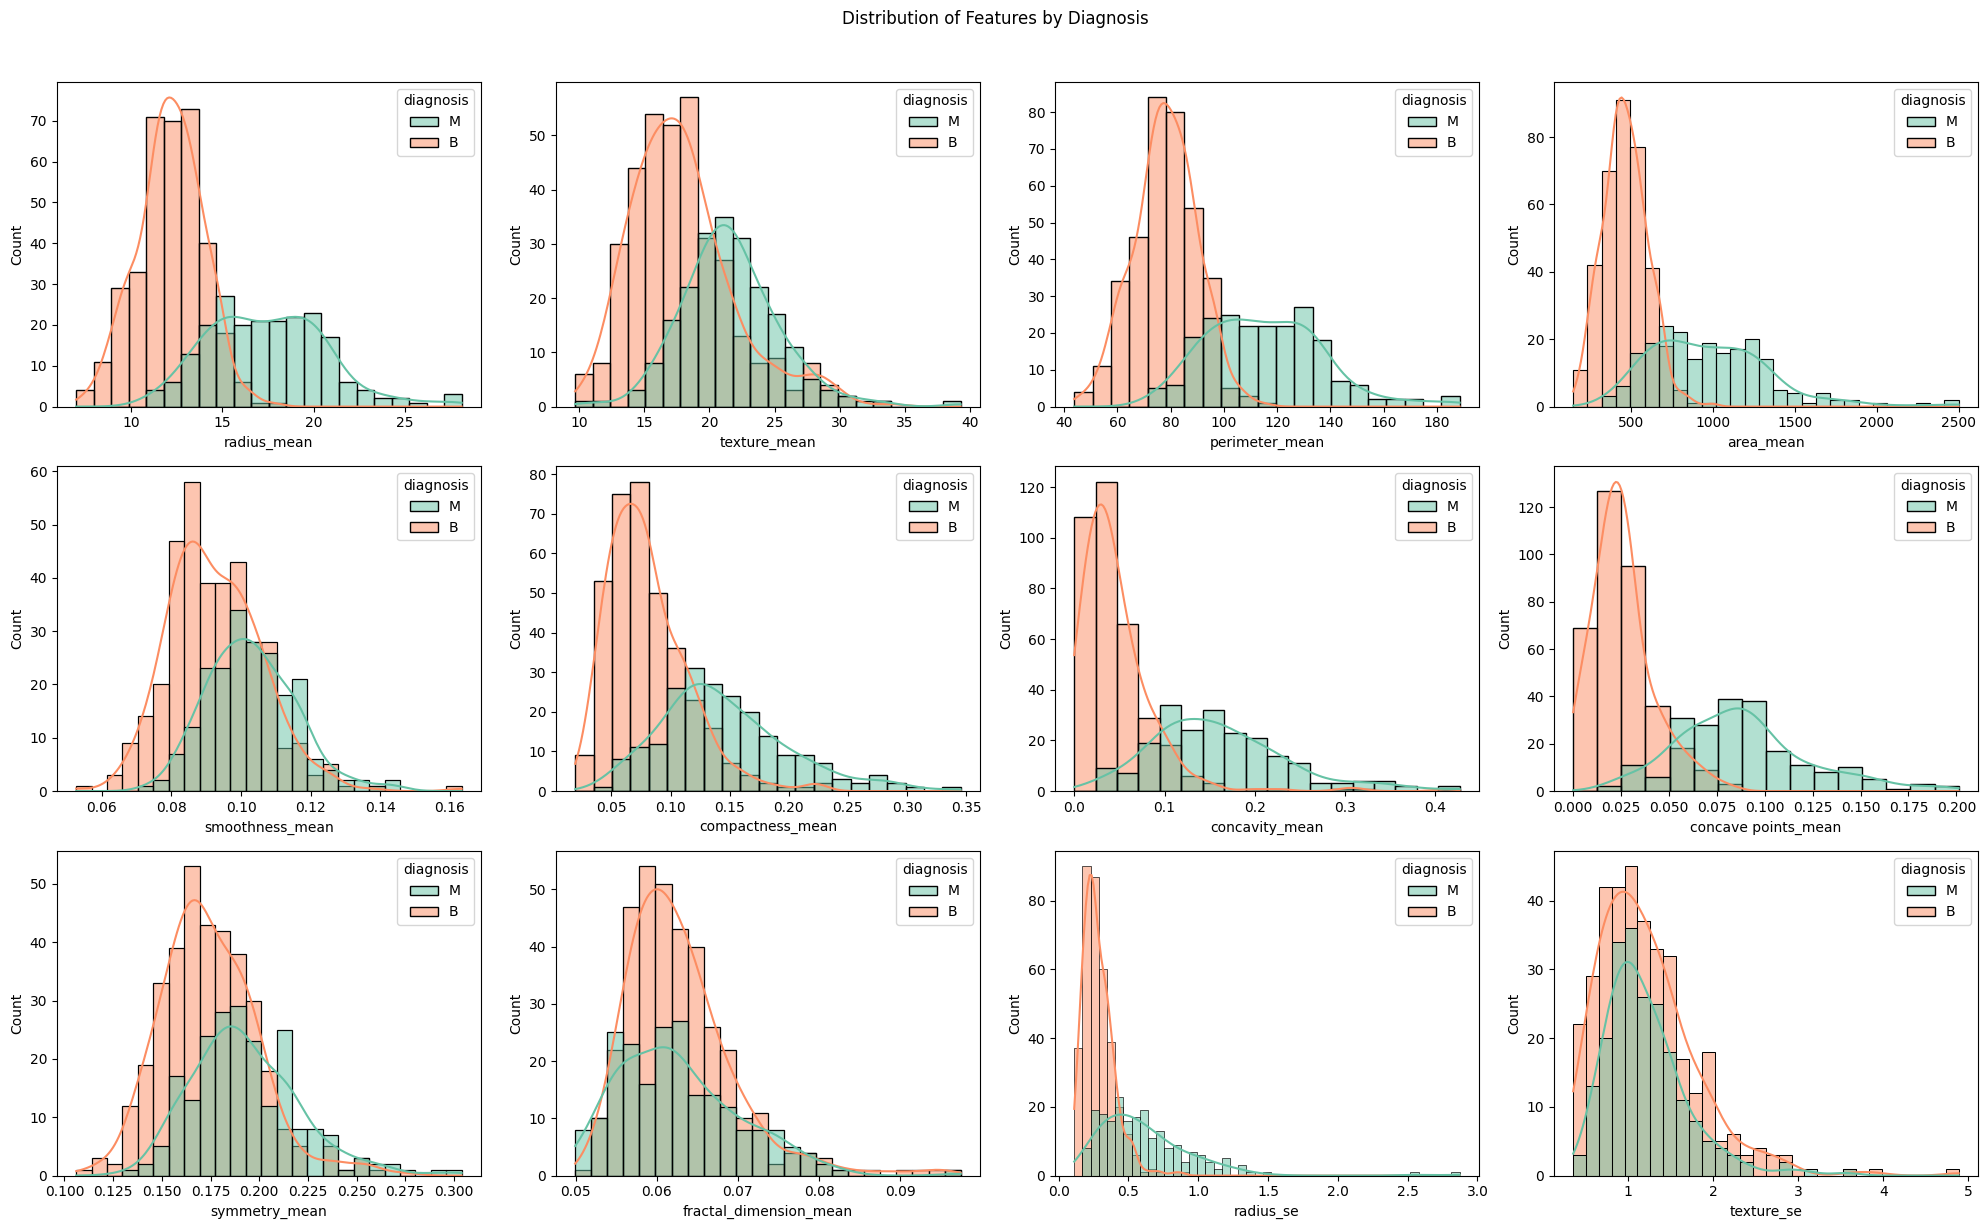

In [ ]:
#Visualizing the distribution of each feature
plt.figure(figsize = (20,12))
for i, col in enumerate(df.columns[2:], 1):
  if i <= 12:
    plt.subplot(3,4,i)
    sns.histplot(data = df, x = col, hue = 'diagnosis', kde = True, alpha = 0.5, palette = "Set2")
    plt.xlabel(col)
  plt.suptitle('Distribution of Features by Diagnosis', y = 1.02)
plt.tight_layout()
plt.show()

The histograms are color-coded based on the diagnosis ('M' for malignant and 'B' for benign). This allows us to compare the distributions of features between malignant and benign diagnoses. We can observe that there are noticeable differences in the feature distributions between the two diagnoses.

By examining the histograms, we can identify features that exhibit distinct distributions for malignant and benign diagnoses. Features that show clear separation or significant differences in their distributions between the two diagnoses may be potential discriminative factors for distinguishing between malignant and benign cases.

Features with distributions that vary significantly between diagnoses may have higher predictive power i.e *radius_mean, texture_mean, perimeter_mean, area_mean, compactness_mean, concavity_mean* and so on

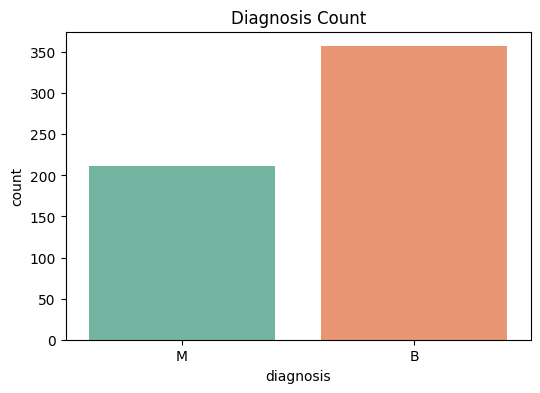

In [ ]:
plt.figure(figsize = (6,4))
sns.countplot(data = df, x = 'diagnosis', palette = 'Set2')
plt.title('Diagnosis Count')
plt.show()

# **MACHINE LEARNING - SVM**

SVM can be applied to improve the accuracy of medical condition diagnosis in the following ways:


1.   **Optimizing SVM Parameters**: Using techniques like grid search can improve model performance. By tuning parameters such as regularization parameter, kernel type and kernel specific parameters, the best configuration can be found.
2.   **Handling Class Imbalance**: Usinf class-weighted SVMs can help address overfitting/underfitting and improve the model's ability to correctly classify classes.
3. **Preprocessing and Normalization**: Preprocessing techniques such as scaling and normalization can imporve the SVM performance by ensuring that all features have a similar scale hence improving convergence.
4. **Model Interpretability**: SVMs provide interpretable decision boundaries, making it easy to understand the reasoning behind the models predictions.


In [ ]:
x = df_numerical.drop(['id', 'diagnosis_x'], axis = 1)
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
y = df_numerical[['diagnosis_x']]

In [ ]:
#scaling the independent variables
scaler = StandardScaler()
x_norm = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x_norm.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_norm, y, train_size = 0.7, random_state=42, stratify=y)

In [ ]:
x_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
78,1.719055,1.089149,2.130809,1.678336,2.294354,4.568425,3.598263,2.875535,3.995524,2.639918,...,1.470454,0.984029,1.877663,1.305104,1.382207,2.303684,2.379147,2.073768,4.107940,0.869706
330,0.540396,-0.879550,0.569700,0.393370,-0.103210,0.620832,0.396746,0.554335,-0.108136,-0.430613,...,0.515803,-0.602070,0.507515,0.332978,0.487955,1.231153,1.071822,1.271326,0.191293,0.404213
378,-0.132717,-0.963324,-0.152364,-0.211286,-0.973563,-0.546958,-0.581412,-0.624450,-0.071627,-0.542604,...,-0.358085,-0.983124,-0.277044,-0.393040,-0.213419,0.357097,-0.073347,-0.140179,0.786637,0.689050
213,0.935176,1.459153,0.928055,0.833637,0.301721,0.194424,0.996873,0.439809,-1.838683,-0.586549,...,0.372916,0.389649,0.391350,0.246841,-0.353694,-0.476882,0.038915,-0.071660,-2.099484,-0.873676
89,0.145616,-0.942380,0.156563,-0.008501,1.198406,0.560187,0.136356,0.560267,1.111279,0.093901,...,0.014664,-1.211106,0.063706,-0.135330,-0.204652,0.347555,-0.056556,0.382093,0.404840,0.043456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,-0.311646,-0.202373,-0.385500,-0.372831,-0.464730,-1.263703,-0.793214,-0.507861,-1.258183,-0.590802,...,-0.614867,-0.466909,-0.679153,-0.588344,-1.549975,-1.323648,-1.073966,-0.981753,-1.478256,-1.233324
415,-0.635423,0.437570,-0.641704,-0.628800,0.097477,-0.438556,-0.794093,-0.699769,0.757138,0.014515,...,-0.666638,0.249603,-0.660388,-0.628776,0.448503,-0.226243,-0.747399,-0.486889,0.281889,-0.578309
458,-0.320167,1.359089,-0.385500,-0.383070,-0.901686,-1.016007,-0.963460,-0.807330,-0.527994,-1.177690,...,-0.399502,1.010084,-0.482567,-0.443140,-0.463284,-0.922180,-1.091765,-0.843496,-0.962184,-1.165717
476,0.020650,0.288638,0.018164,-0.103779,-0.501736,0.122408,-0.479215,-0.473040,-1.115796,-0.383832,...,0.037443,0.257745,0.144127,-0.091558,-0.748217,0.563842,-0.100693,0.293779,-0.593330,-0.297351


In [ ]:
y_train

,diagnosis_x
78,1
330,1
378,0
213,1
89,0
...,...
37,0
415,0
458,0
476,0


In [ ]:
model = SVC()
model

SVC()

In [ ]:
model.fit(x_train, y_train)

SVC()

In [ ]:
model.score(x_test, y_test)

0.9649122807017544

In [ ]:
y_pred = model.predict(x_test)


In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1])

In [ ]:
report = classification_report(y_test, y_pred)

In [ ]:
#SVM model rperformance report before parameters are optimized
print(report)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       107
           1       1.00      0.91      0.95        64

    accuracy                           0.96       171
   macro avg       0.97      0.95      0.96       171
weighted avg       0.97      0.96      0.96       171



**MODEL PARAMETER OPTIMIZATION**

Use Scikit-learn's GridSearchCV to perform the grid search. It automatically trys out all combinations of parameter values. Afterwards, the best combination of parameters is used to create the SVM model

In [ ]:
from sklearn.model_selection import GridSearchCV


In [ ]:
#Define parameters grid
pars = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear', 'poly']
}

In [ ]:
svm = SVC()

In [ ]:
#Performing grid search
grid_search = GridSearchCV(svm, pars, cv = 5, scoring ='accuracy')
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'linear', 'poly']},
             scoring='accuracy')

In [ ]:
best_pars = grid_search.best_params_
best_pars

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [ ]:
best_svm = SVC(**best_pars)

In [ ]:
best_svm.fit(x_train, y_train)

SVC(C=10, gamma=0.01)

In [ ]:
y_predict = best_svm.predict(x_test)

In [ ]:
best_svm.score(x_test, y_test)

0.9766081871345029

In [ ]:
report2 = classification_report(y_test, y_predict)

In [ ]:
print(f"**Report Before Paramter Optimization** \n{report} \n\n**Report After Parameter Optimization** \n{report2}")

**Report Before Paramter Optimization** 
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       107
           1       1.00      0.91      0.95        64

    accuracy                           0.96       171
   macro avg       0.97      0.95      0.96       171
weighted avg       0.97      0.96      0.96       171
 

**Report After Parameter Optimization** 
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       107
           1       1.00      0.94      0.97        64

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171

